### General Overview of the Real411 Data

In [2]:
import pandas as pd
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
filtered_data = pd.read_csv("filtered_data.csv")
target_source= filtered_data["source"]
target_source.value_counts()

source
Twitter/X        227
WhatsApp          25
Other             20
Facebook          12
Other Website      9
Youtube            4
Instagram          3
Radio / TV         2
Name: count, dtype: int64

C:\Users\g21m3012\AppData\Local\Temp\ipykernel_16832\2314493522.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


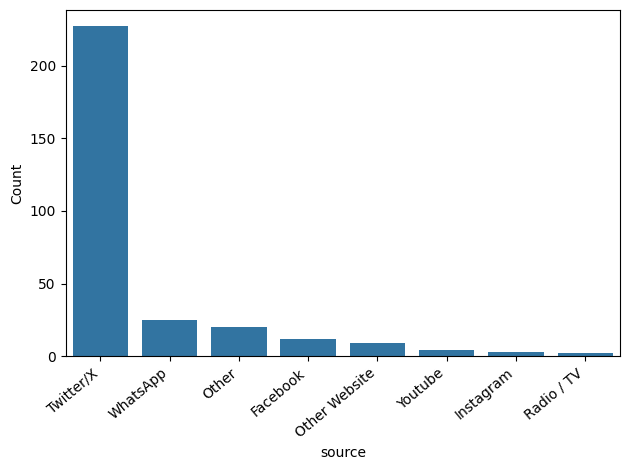

In [4]:
source_count = target_source.value_counts().to_frame(name="Count")

ax = sns.barplot(source_count, x="source", y="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### Analyzing the Noun and verb ratio of the Twitter data gathered by Real411

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
# getting the data 
df = pd.read_csv("clean_twitter.csv")

# getting all the media files and converting them into one big string
media_text = df["media"].str.cat(sep='\n')

Nouns: 3446 Verbs : 1414


<Axes: xlabel='count', ylabel='type of speach'>

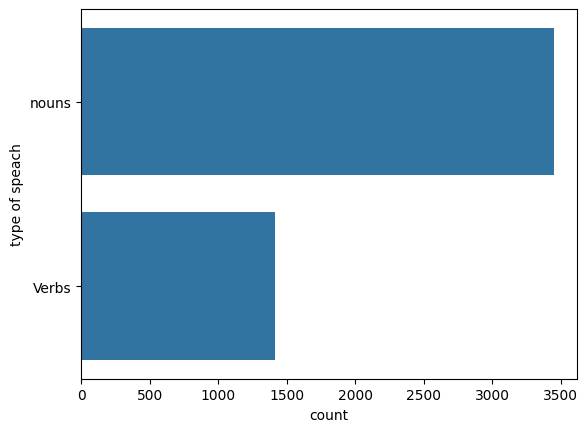

In [7]:
doc = nlp(media_text)

all_nouns = [chunk.text for chunk in doc.noun_chunks]
all_verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
types_of_speach = ["nouns", "Verbs"]

print(f"Nouns: {len(all_nouns)} Verbs : {len(all_verbs)}")


speach = pd.DataFrame(zip(types_of_speach, [len(all_nouns), len(all_verbs)]), columns=["type of speach", "count"])
sns.barplot(speach, x="count", y="type of speach")

Barbosa et al. (2022) observed that fake news exhibits a higher ratio of nouns to verbs.

#### Checking the sentiment of the twitter Data using VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a tool used specfically for sentiment analysis for data extracted from social media and will try test out on this real411 dataset

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


media_list = media_text.split("\n")

labelled_sentiment_scores = []
analyzer = SentimentIntensityAnalyzer()

for i in media_list:
    score = analyzer.polarity_scores(i)["compound"]
    if score >= 0.5:
        labelled_sentiment_scores.append("Positive")
    elif score > -0.5 and  score < 0.5:
        labelled_sentiment_scores.append("Neutral")
    else:
        labelled_sentiment_scores.append("Negative")

<Axes: xlabel='count', ylabel='Sentiment'>

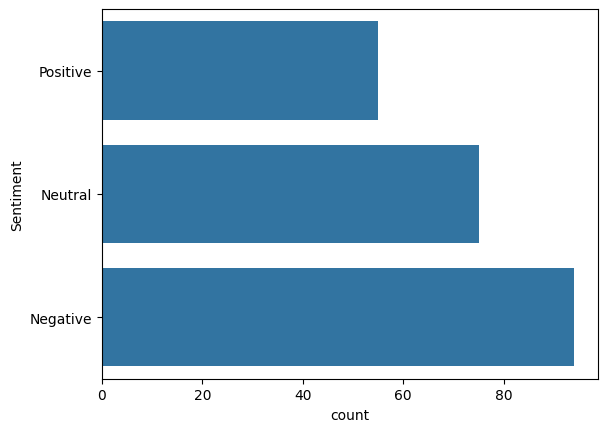

In [28]:
sentFilter = lambda x, y: [i for i in y if i == x]
postive = len(list(sentFilter("Positive", labelled_sentiment_scores)))
negative = len(list(sentFilter("Neutral", labelled_sentiment_scores)))
neutral = len(list(sentFilter("Negative", labelled_sentiment_scores)))

sentDataFrame = pd.DataFrame(zip([postive, neutral, negative], ["Positive", "Neutral", "Negative"]), columns=["count", "Sentiment"])
sns.barplot(sentDataFrame, x="count", y="Sentiment")


#### Checking the ratio of subjectiviety and objectivity the twitter Data using a Transformer model

In [29]:
from setfit import SetFitModel

model = SetFitModel.from_pretrained("SOUMYADEEPSAR/SetFit_SubjectivityDetection")

c:\Users\g21m3012\Desktop\Project\Data collection\Data_gathering-\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\g21m3012\Desktop\Project\Data collection\Data_gathering-\myenv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


111 113


<Axes: xlabel='count', ylabel='subjectivity'>

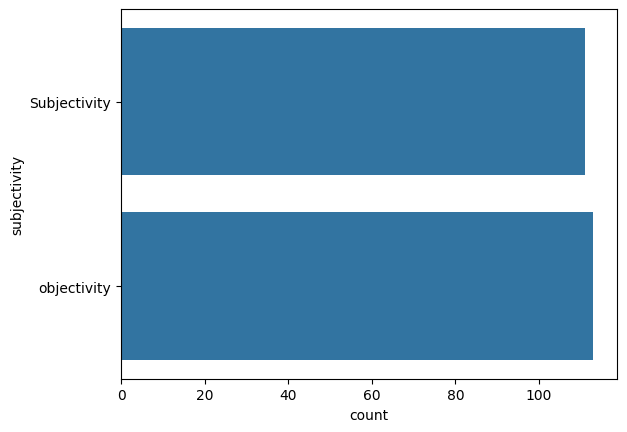

In [32]:
subjectivivty_list = []

for i in media_list:
    subjectivivty_list.append(model(i))

subj = len(list(sentFilter("SUBJ", subjectivivty_list)))
obj = len(list(sentFilter("OBJ", subjectivivty_list)))

print(subj, obj)

sentDataFrame = pd.DataFrame(zip([subj, obj], ["Subjectivity", "objectivity"]), columns=["count", "subjectivity"])
sns.barplot(sentDataFrame, x="count", y="subjectivity")

